# 聚类
可视化学习kmeans：    
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [1]:
#啤酒聚类
# beer dataset
import pandas as pd
beer = pd.read_csv('/Users/liulebin/Documents/codeing/codeingForSelfStudy/ML-Basic-Theory-Study/ML_Learning_code/18.Clustering/data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [3]:
#四列都要
X = beer[["calories","sodium","alcohol","cost"]]

## K-means clustering

In [4]:
from sklearn.cluster import KMeans
#指定K，聚类的类别
km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [5]:
#训练完成之后，就可以调用了，对应样本的每一条
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2],
      dtype=int32)

In [8]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
18,Olympia_Goled_Light,72,6,2.9,0.46,0,1
15,Pabst_Extra_Light,68,15,2.3,0.38,0,1
0,Budweiser,144,15,4.7,0.43,1,0
1,Schlitz,151,19,4.9,0.43,1,0
2,Lowenbrau,157,15,0.9,0.48,1,0
3,Kronenbourg,170,7,5.2,0.73,1,0
4,Heineken,152,11,5.0,0.77,1,0
5,Old_Milwaukee,145,23,4.6,0.28,1,0
6,Augsberger,175,24,5.5,0.40,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,0


In [12]:
# from pandas.tools.plotting import scatter_matrix

%matplotlib inline

cluster_centers = km.cluster_centers_

cluster_centers_2 = km2.cluster_centers_

In [14]:
#差个数据在各个指标的情况，mean就是聚类中心点
beer.groupby("cluster").mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,70.00,10.5,2.600000,0.420000,1
1,150.00,17.0,4.521429,0.520714,0
2,102.75,10.0,4.075000,0.440000,1


In [15]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,1.000000
1,91.833333,10.166667,3.583333,0.433333,1.333333


In [16]:
centers = beer.groupby("cluster").mean().reset_index()

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [18]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0, 0.5, 'Alcohol')

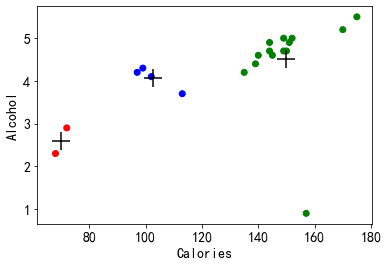

In [19]:
#这里是看的卡路里和酒精含量的图
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster"]])

plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel("Calories")
plt.ylabel("Alcohol")

Text(0.5, 0.98, 'With 3 centroids initialized')

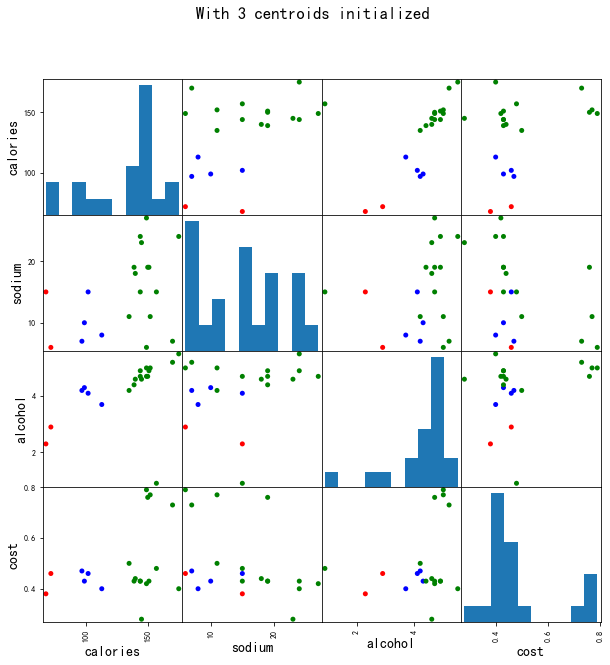

In [23]:
#画一个散点图，x轴有四个属性，y轴有四个属性
#比如第四列，看cost对其他四个变量之间的关系
pd.plotting.scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

Text(0.5, 0.98, 'With 2 centroids initialized')

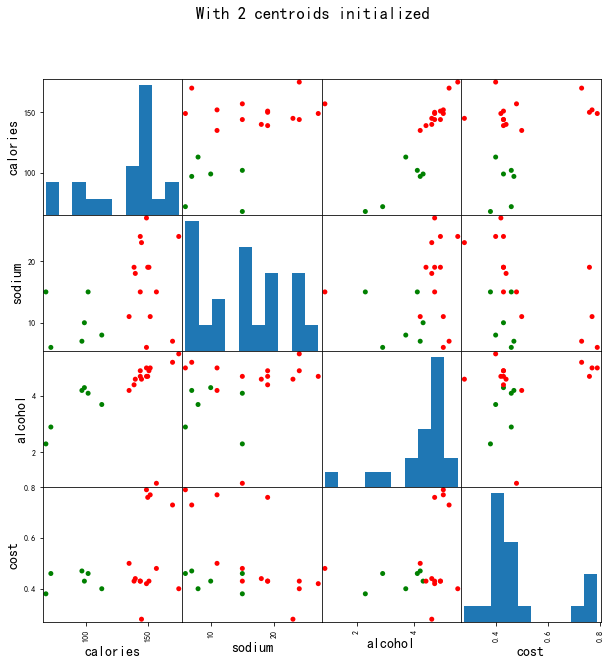

In [22]:

pd.plotting.scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

### Scaled data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [21]:
km = KMeans(n_clusters=3).fit(X_scaled)


In [22]:
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
0,Budweiser,144,15,4.7,0.43,0,1,0
1,Schlitz,151,19,4.9,0.43,0,1,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0
16,Hamms,139,19,4.4,0.43,0,1,0
5,Old_Milwaukee,145,23,4.6,0.28,0,1,0
6,Augsberger,175,24,5.5,0.40,0,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1,0
10,Coors,140,18,4.6,0.44,0,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,0,1
12,Michelob_Light,135,11,4.2,0.50,0,1,1


What are the "characteristics" of each cluster?

In [23]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,148.375,21.125,4.7875,0.4075,0.0,1.00
1,105.375,10.875,3.3250,0.4475,1.0,0.25
2,155.250,10.750,4.9750,0.7625,0.0,1.00


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A279F8F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000018A27ED47B8>]], dtype=object)

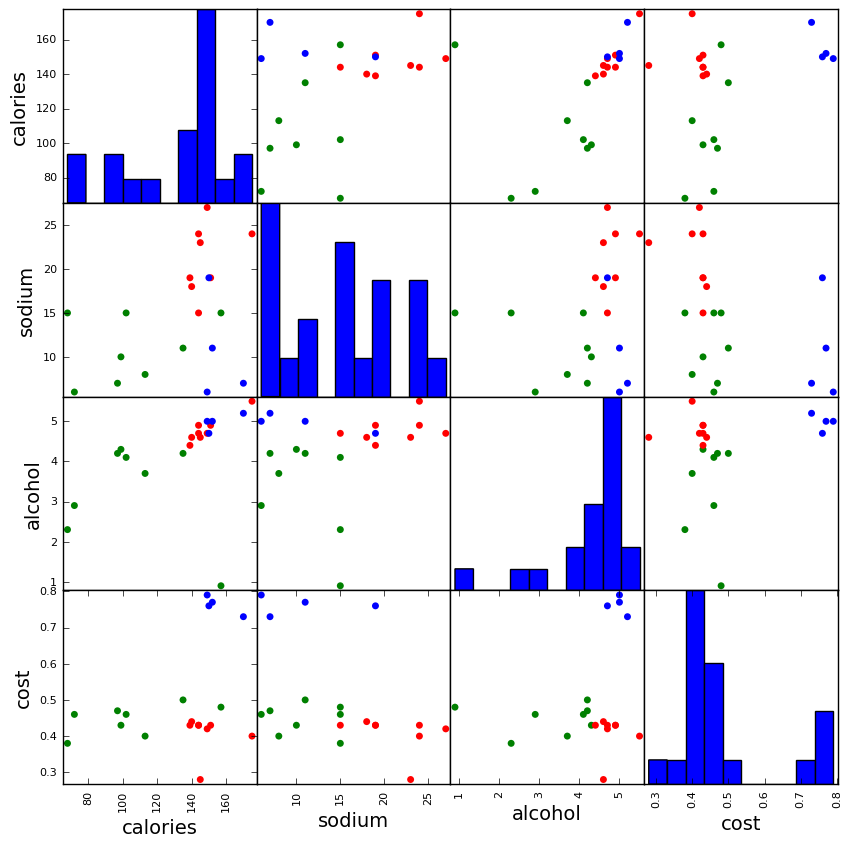

In [24]:
pd.scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)


## 聚类评估：轮廓系数（Silhouette Coefficient ）

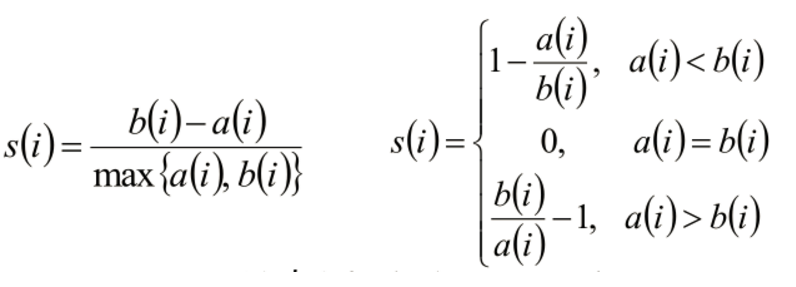

In [9]:
from IPython.display import Image
Image(filename = '/Users/liulebin/Documents/codeing/codeingForSelfStudy/ML-Basic-Theory-Study/ML_Learning_code/18.Clustering/1.png', width=100, height=60)

- 计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。
- 计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}


* si接近1，则说明样本i聚类合理
* si接近-1，则说明样本i更应该分类到另外的簇
* 若si 近似为0，则说明样本i在两个簇的边界上。

In [25]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster)
print(score_scaled, score)
#从数据上看标准化的数据反而更差

0.179780680894 0.673177504646


In [26]:
#对K调参数
#纵坐标为si(轮廓系数)，随着k增大，看si最好的是哪个。
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.69176560340794857,
 0.67317750464557957,
 0.58570407211277953,
 0.42254873351720201,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.33061511213823314,
 0.34131096180393328,
 0.34597752371272478,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.28495140011748982,
 0.23498077333071996,
 0.15880910174962809,
 0.084230513801511767]

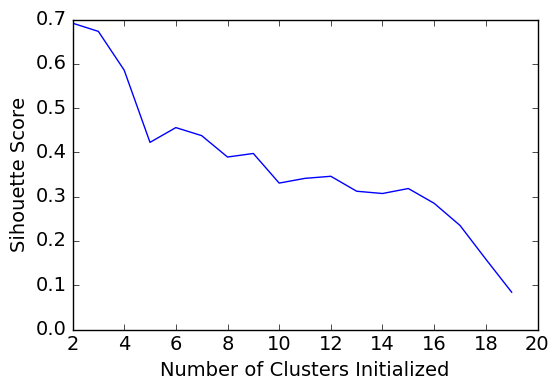

In [27]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

##  DBSCAN clustering

In [28]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)
#eps为半径  
#根据数据情况，是否归一化，选择eps

In [29]:
labels = db.labels_

In [32]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,1,0,1,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,2,-1
6,Augsberger,175,24,5.5,0.40,0,1,0,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0,0
16,Hamms,139,19,4.4,0.43,0,1,0,0
14,Kirin,149,6,5.0,0.79,0,1,2,0
13,Becks,150,19,4.7,0.76,0,1,2,0
12,Michelob_Light,135,11,4.2,0.50,0,1,1,0
10,Coors,140,18,4.6,0.44,0,1,0,0
0,Budweiser,144,15,4.7,0.43,0,1,0,0


In [33]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.333333,0.666667,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,1.000000,0.666667
1,99.333333,10.666667,4.200000,0.453333,1.000000,0.000000,1.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,0.000000,1.000000


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A278A3940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000018A28BBC470>]], dtype=object)

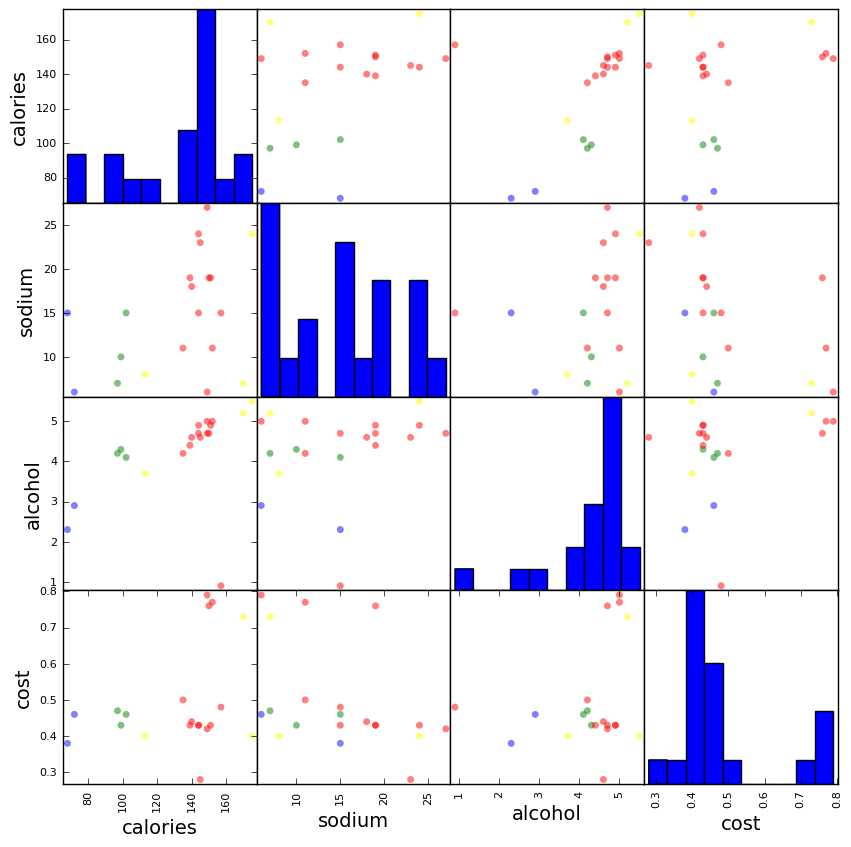

In [34]:
pd.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)